In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [177]:
# Load data
data = pd.read_csv("C:\\Users\\ajayakumar.vijayakum\\Downloads\\03_Churn_Modelling\\Churn_Modelling.csv")

# Basic information and statistical summary
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [178]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [179]:
np.sqrt(np.mean((data['Exited'] - np.mean(data['Exited'])) ** 2, axis=0)) # standard deviation

0.4027484450621752

In [180]:
# Get unique count for each variable
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [181]:
import seaborn as sns

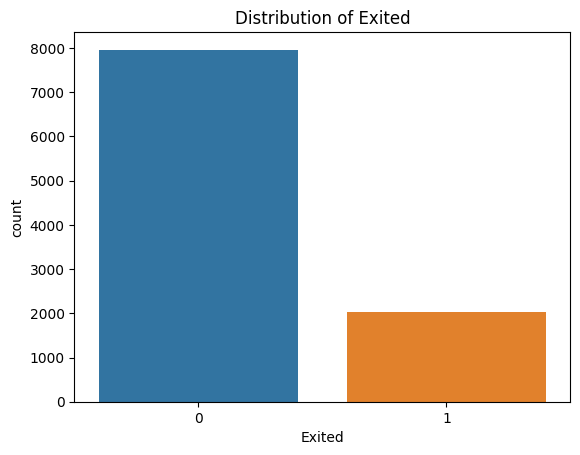

In [182]:
# Visualize target variable distribution
sns.countplot(x='Exited', data=data)
plt.title('Distribution of Exited')
plt.show()

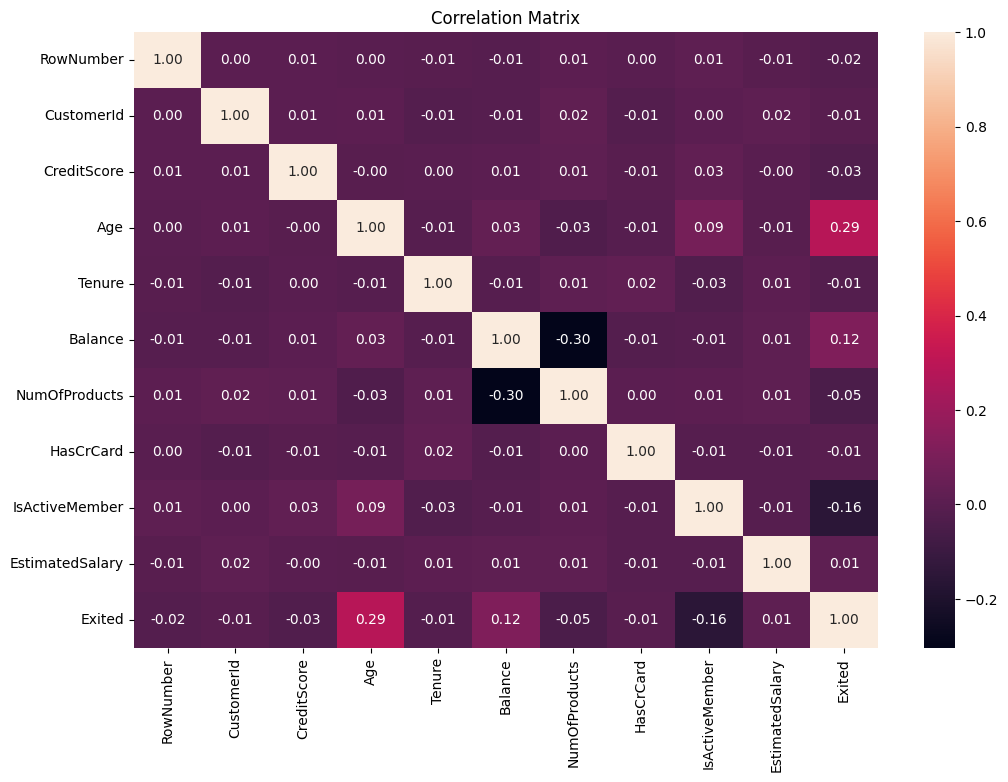

In [183]:
# Visualize correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f") # annotate , to know the strength and direction of relationship bw variables
plt.title('Correlation Matrix')
plt.show()

In [184]:
# Drop unnecessary columns for preprocessing
data = data.drop(['Surname', 'RowNumber', 'CustomerId'], axis=1)
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [185]:
# One-hot encode categorical variables and drop first category to avoid multicollinearity
coded = pd.get_dummies(data, drop_first=True)

In [186]:
# Define features and target variable
X = coded.drop('Exited', axis=1).values
y = (coded['Exited']).values 
X, y

(array([[619.,  42.,   2., ...,   0.,   0.,   0.],
        [608.,  41.,   1., ...,   0.,   1.,   0.],
        [502.,  42.,   8., ...,   0.,   0.,   0.],
        ...,
        [709.,  36.,   7., ...,   0.,   0.,   0.],
        [772.,  42.,   3., ...,   1.,   0.,   1.],
        [792.,  28.,   4., ...,   0.,   0.,   0.]]),
 array([1, 0, 1, ..., 1, 1, 0], dtype=int64))

In [187]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [188]:
X_train, X_test, y_train, y_test

(array([[686.,  32.,   6., ...,   0.,   0.,   1.],
        [632.,  42.,   4., ...,   1.,   0.,   1.],
        [559.,  24.,   3., ...,   0.,   1.,   1.],
        ...,
        [735.,  38.,   1., ...,   0.,   0.,   0.],
        [667.,  43.,   8., ...,   0.,   0.,   1.],
        [697.,  51.,   1., ...,   1.,   0.,   1.]]),
 array([[596.,  32.,   3., ...,   1.,   0.,   1.],
        [623.,  43.,   1., ...,   0.,   0.,   1.],
        [601.,  44.,   4., ...,   0.,   1.,   0.],
        ...,
        [730.,  47.,   7., ...,   0.,   0.,   0.],
        [692.,  29.,   4., ...,   0.,   0.,   1.],
        [628.,  39.,   1., ...,   1.,   0.,   1.]]),
 array([0, 0, 1, ..., 1, 1, 0], dtype=int64),
 array([0, 0, 0, ..., 1, 1, 1], dtype=int64))

In [189]:
from sklearn.preprocessing import StandardScaler

# Normalize features (feature scaling)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train, X_test

(array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
         -0.57638802,  0.91324755],
        [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
         -0.57638802,  0.91324755],
        [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
          1.73494238,  0.91324755],
        ...,
        [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
         -0.57638802, -1.09499335],
        [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
         -0.57638802,  0.91324755],
        [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
         -0.57638802,  0.91324755]]),
 array([[-0.57749609, -0.6557859 , -0.69539349, ...,  1.72572313,
         -0.57638802,  0.91324755],
        [-0.29729735,  0.3900109 , -1.38944225, ..., -0.57946723,
         -0.57638802,  0.91324755],
        [-0.52560743,  0.48508334, -0.3483691 , ..., -0.57946723,
          1.73494238, -1.09499335],
        ...,
        [ 0.81311987,  0.77030065,  0.69270405, ..., -

In [190]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
# Initialize and train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# model1 = GaussianNB()
# model1.fit(X_train, y_train)

LogisticRegression()

In [191]:
# Make predictions
y_train_pred = model.predict_proba(X_train)[:, 1] # first column negative class (class 0), second column positive class (class 1)
y_test_pred = model.predict_proba(X_test)[:, 1]
y_test_pred_classes = model.predict(X_test)



# y_train_pred1 = model1.predict_proba(X_train)[:, 1] # first column negative class (class 0), second column positive class (class 1)
# y_test_pred1 = model1.predict_proba(X_test)[:, 1]
# y_test_pred_classes1 = model1.predict(X_test)


In [192]:
from sklearn.metrics import accuracy_score
# Calculate accuracy
train_accuracy = accuracy_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test, y_test_pred_classes)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# # Calculate accuracy
# train_accuracy = accuracy_score(y_train, model1.predict(X_train))
# test_accuracy = accuracy_score(y_test, y_test_pred_classes1)
# print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
# print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Training Accuracy: 81.14%
Test Accuracy: 81.10%


Confusion Matrix:
[[1543   64]
 [ 314   79]]


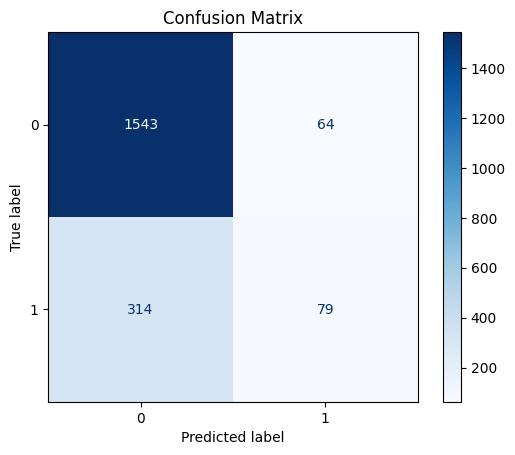

In [193]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred_classes)
print('Confusion Matrix:')
print(cm)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()



# # Confusion matrix
# cm1 = confusion_matrix(y_test, y_test_pred_classes1)
# print('Confusion Matrix:')
# print(cm1)

# # Plot confusion matrix
# disp = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=model.classes_)
# disp.plot(cmap=plt.cm.Blues)
# plt.title('Confusion Matrix')
# plt.show()

79